<a href="https://colab.research.google.com/github/akeelrashid/ML-Retail-Sales-Prediction-Project-/blob/main/ML_Regression_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
**Akeel Rashid**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**
Rossmann operates over 3,000 drug stores in 7 European Countries.Currently,Rossmann store managers are tasked with predicting their daily sales for upto six weeks in advance.Store sales are influenced by many factors,including promotions,competition,school and state holidays,seasonality,and loclity.With thousands of individual managers predicting sales based on their unique circumstance the accuracy of result can be quite varied.You are provided with historical sales data for 1,115 Rossmann stores.The task is to forecast the 'Sales' column for the test set.Note that some stores in the dataset were temporarily closed for reburisment

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import math
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#Mouting Google drive with colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
ross_store=pd.read_csv('/content/drive/MyDrive/Data Science/Machine Learning/Regression Capstone Project/Rossmann Stores Data.csv')

In [4]:
store=pd.read_csv('/content/drive/MyDrive/Data Science/Machine Learning/Regression Capstone Project/store.csv')

### Dataset First View

In [150]:
# Dataset First Look
ross_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [151]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [152]:
# ross_store Dataset Rows & Columns count
print(f'Shape of dataset is :{ross_store.shape}')
print(f'Our dataset contains {ross_store.index.value_counts().sum()} Columns')
print(f'Our dataset contains {ross_store.columns.value_counts().sum()} Rows')


Shape of dataset is :(1017209, 9)
Our dataset contains 1017209 Columns
Our dataset contains 9 Rows


In [153]:
#store data set Rows & column count
print(f'Shape of dataset is :{store.shape}')
print(f'Our dataset contains {store.index.value_counts().sum()} Columns')
print(f'Our dataset contains {store.columns.value_counts().sum()} Rows')

Shape of dataset is :(1115, 10)
Our dataset contains 1115 Columns
Our dataset contains 10 Rows


### Dataset Information

In [154]:
# ross_store Dataset Info
ross_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Ross store dataset does not contain any null value


In [155]:
#store dataset info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are many null values present in this dataset


#### Duplicate Values

In [156]:
# ross_store Dataset Duplicate Value Count
ross_store.duplicated().sum()

0

Ross_store dataset doesnot contain any duplicate value

In [157]:
# store Dataset Duplicate Value Count
store.duplicated().sum()

0

Store dataset doesn't contain any duplicated values



#### Missing Values/Null Values

In [158]:
# Missing Values/Null Values Count
ross_store.isnull().sum().sort_values(ascending=False)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

ross_store dataset doesn't contains any null values

In [159]:
# Missing Values/Null Values Count
store.isnull().sum().sort_values(ascending=False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

There are too many columns which contain null values

In [160]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
percentiles = [0.01, 0.25, 0.5, 0.75, 0.95,0.99]
ross_store.describe(percentiles=percentiles)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209,1017209,1017209,1017209,1017209,1017209,1017209
mean,558,4,5774,633,1,0,0
std,322,2,3850,464,0,0,0
min,1,1,0,0,0,0,0
1%,11,1,0,0,0,0,0
25%,280,2,3727,405,1,0,0
50%,558,4,5744,609,1,0,0
75%,838,6,7856,837,1,1,0
95%,1060,7,12137,1362,1,1,1
99%,1104,7,17160,2267,1,1,1


There are some columns which contains outliers like Sales,customers

In [161]:
store.describe(percentiles=percentiles)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115,1112,761,761,1115,571,571
mean,558,5405,7,2009,1,24,2012
std,322,7663,3,6,1,14,2
min,1,20,1,1900,0,1,2009
1%,12,50,1,1994,0,1,2009
25%,280,718,4,2006,0,13,2011
50%,558,2325,8,2010,1,22,2012
75%,836,6882,10,2013,1,37,2013
95%,1059,20145,12,2014,1,45,2014
99%,1104,35145,12,2015,1,48,2015


CompetitionDistance column contain outlier

* state holiday cotains O instead of 0(zero)
* Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth,CompetitionOpenSinceYear contains too many null values
* competition distance column contains black spaces

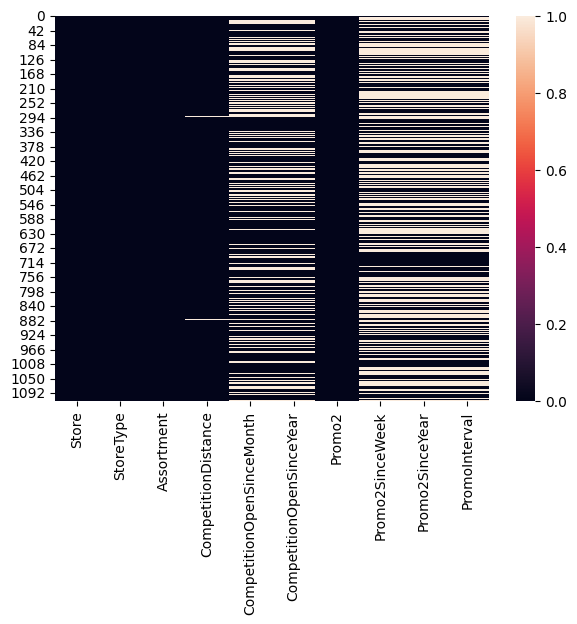

In [162]:
# Visualizing the missing values
plt.figure(figsize=(7,5))
sns.heatmap(store.isnull())
plt.show()

### What did you know about your dataset?

* We have a dataset of rosmann company.One dataset is roaaman store which contains **1017209** rows and **9** columns.The dataset doesn't contain any null or duplicated values.It gives us inforamation about the type of store,sales in each store by what date through how many number of customers.Also whether the sale was affected by closure of shop on weekends or or any kind of stateholiday or schoolholiday.It also gives on how sales was affected on applying promo
* The other dataset is store which has **1115** Rows and **10** Column.This dataset contains too many null values in different columns.which needs to be taken care in future analysis.It provides information like type of store and what is assostment type used in store,how far away is competitor from store,since how long is competitor there in the market and how often is promo applied on the store

## ***2. Understanding Your Variables***

In [163]:
# Dataset Columns
ross_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [164]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [165]:
# Check Unique Values for each variable.
unique_vals =ross_store.apply(lambda col: col.unique())
print(unique_vals)

Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                       [0, a, b, c, 0]
SchoolHoliday                                               [1, 0]
dtype: object


* state holiday cotains O instead of 0(zero)

In [166]:
unique_vals =store.apply(lambda col: col.unique())
print(unique_vals)

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [5]:
#dropping coluns from store dataset which contains too many null values
store.drop(columns=['PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'],axis=1,inplace=True)

In [6]:
#filling null values in competitiondistance column with median
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(),inplace=True)

In [7]:
#merging both the dataset
data=ross_store.merge(store,on='Store',how='left')

In [8]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0


In [9]:
data.shape

(1017209, 13)

In [10]:
# creating year,month,week_num column from Date Column
data['Date']=pd.to_datetime(data['Date'])
data['year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['week_num']=data['Date'].dt.week


In [11]:
#dropping date column from data
data.drop(columns='Date',axis=1,inplace=True)

In [13]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,Month,week_num
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,1,2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,1,2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,0,2015,7,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,0,2015,7,31


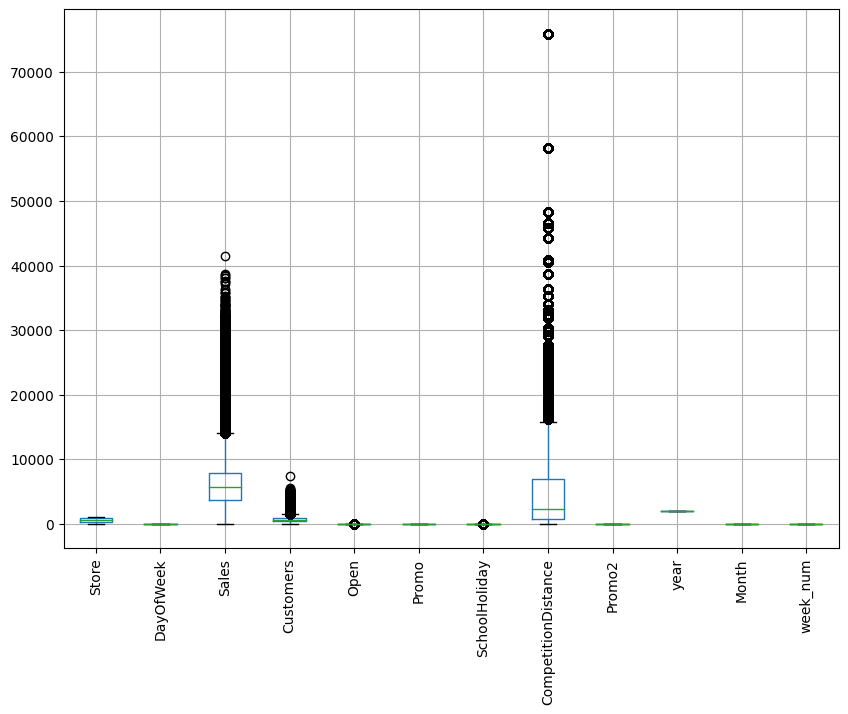

In [14]:
#Now let's deal with the outliers
plt.figure(figsize=(10,7))
data.boxplot()
plt.xticks(rotation='vertical')
plt.show()

Columns like Sales,CompetitionDistance and customers contains Outliers
but CompetitionDistance contains maximum

In [176]:
percentiles=[0.90,0.95,0.99]
data['CompetitionDistance'].describe(percentiles=percentiles)

count   1017209
mean       5422
std        7707
min          20
50%        2325
90%       15710
95%       20390
99%       36410
max       75860
Name: CompetitionDistance, dtype: float64

From this we can see that 99% value is around 36K and maximum value is around 75K,so let's consider only value around 95%

In [177]:
percentiles=[0.90,0.95,0.99]
data['Sales'].describe(percentiles=percentiles)

count   1017209
mean       5774
std        3850
min           0
50%        5744
90%       10288
95%       12137
99%       17160
max       41551
Name: Sales, dtype: float64

In sales Feature also outliers is there and let's cosider only those value around 95%

In [178]:
data['Customers'].describe(percentiles=percentiles)

count   1017209
mean        633
std         464
min           0
50%         609
90%        1116
95%        1362
99%        2267
max        7388
Name: Customers, dtype: float64

Here also let's consider value around 1400 that is around 95%

In [15]:
#let's first create copy of our dataset
df=data.copy()

In [16]:
df.shape

(1017209, 15)

In [17]:
#let's consider all the values in which competition distance and sales values are around 95% percentile
df=df[df['CompetitionDistance']<20000]
df=df[df['Customers']<1400]
df=df[df['Sales']<13000].reset_index(drop=True)

In [18]:
df.shape

(908510, 15)

In [183]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,Month,week_num
0,1,5,5263,555,1,1,0,1,c,a,1270,0,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570,1,2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130,1,2015,7,31
3,6,5,5651,589,1,1,0,1,a,a,310,0,2015,7,31
4,8,5,8492,833,1,1,0,1,a,a,7520,0,2015,7,31


In [19]:
#let's convert stateholiday into is_state_holiday yes(1) or no(0)
df['is_state_holiday'] = data['StateHoliday'].apply(lambda x: 1 if x in ['a', 'b', 'c'] else 0)

In [20]:
#drop stateholiday column from the dataset
df.drop(columns='StateHoliday',axis=1,inplace=True)

In [186]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,Month,week_num,is_state_holiday
0,1,5,5263,555,1,1,1,c,a,1270,0,2015,7,31,0
1,2,5,6064,625,1,1,1,a,a,570,1,2015,7,31,0
2,3,5,8314,821,1,1,1,a,a,14130,1,2015,7,31,0
3,6,5,5651,589,1,1,1,a,a,310,0,2015,7,31,0
4,8,5,8492,833,1,1,1,a,a,7520,0,2015,7,31,0


### What all manipulations have you done and insights you found?

* first of all i dropped all the columns which includes **'PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'** from the store dataset as these contains too many null values
* After that i filled null values of competitiondistance column of store dataset with median values
* Then i merged both the dataset
* Then i created **Year,Month,Week_num** Columns from the Date column of the dataset and i then droped the Date Column
* Then i visvalize the **outliers** of the data using boxplot and it was found out that columns like **Customerdistance**,**Sales** has maximum outlier
* Then i consider around **95% percentile** values in order to get rid of some outliers
* Then i convert StateHoliday Column into IsSatetHoliday in which i consider **0** as No holiday and **1 **as Holiday and i also dropped StateHoliday Column from the dataset


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [187]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'year', 'Month', 'week_num', 'is_state_holiday'],
      dtype='object')

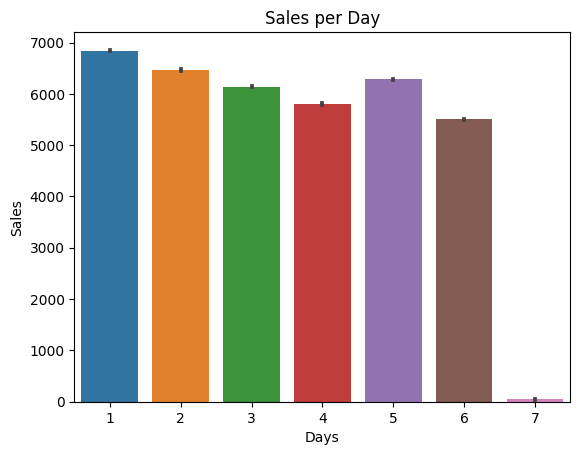

In [188]:
#Chart 1 Sales Per Day
sns.barplot(x=df['DayOfWeek'],y=df['Sales'])
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Sales per Day')
plt.show()

##### 1. Why did you pick the specific chart?

I have used seaborn barplot to find out the sales over week days

##### 2. What is/are the insight(s) found from the chart?

It has been find out that Day-1 i,e Monday has got maximum Sales and Day-7 i,e Sunday has got least

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the barplot it can been seen that after day1-1 there has been decline in the sales.sufficient measures should be taken to look into this matter

#### Chart - 2

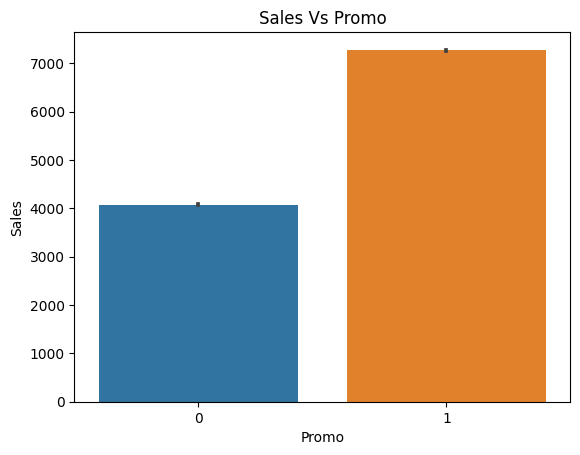

In [189]:
# Chart - 2 Sales Vs Promo
sns.barplot(x=df['Promo'],y=df['Sales'])
plt.title('Sales Vs Promo')
plt.show()

##### 1. Why did you pick the specific chart?

I have used barplot to find out the relationship between sales and promo

##### 2. What is/are the insight(s) found from the chart?

It has been find out that the sales get's almost double when a promo is applied

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

More Promo we run more will be sales

#### Chart - 3

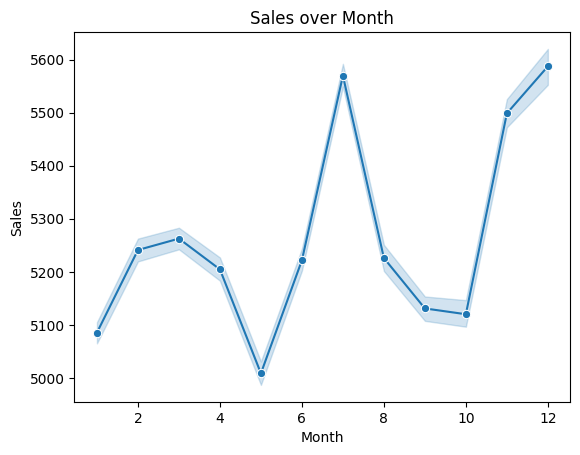

In [190]:
# Chart - Sales Over Months
sns.lineplot(x=df['Month'],y=df['Sales'],marker='o')
plt.title('Sales over Month')
plt.show()

##### 1. Why did you pick the specific chart?

I have Picked lineplot to show sales over month trend

##### 2. What is/are the insight(s) found from the chart?

it can been seen that after october there has a very large growth in sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the plot it can be seen that sales has been droped in the month of may so the management needs to foucus on this and they can also run any promo to increase the sales

#### Chart - 4

<function matplotlib.pyplot.show(close=None, block=None)>

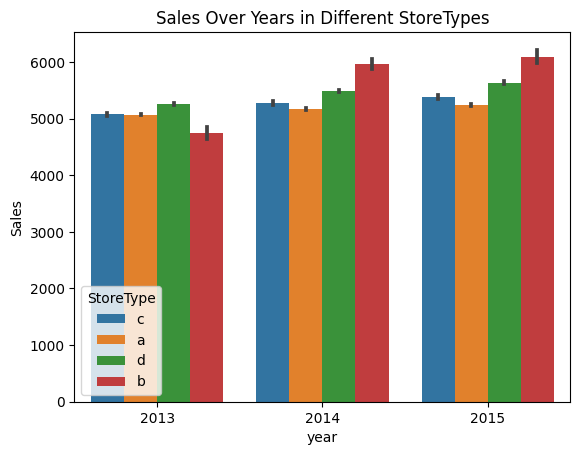

In [191]:
# Chart - 4 Sales Over Years in Different StoreTypes
sns.barplot(x=df['year'],y=df['Sales'],hue=df['StoreType'])
plt.title('Sales Over Years in Different StoreTypes')
plt.show

##### 1. Why did you pick the specific chart?

i have picked barplot to find out Sales over year in different Store types


##### 2. What is/are the insight(s) found from the chart?

It was find out that B store type has maximum sales in all the years

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The graph shows that the sales in b store type has increased over all years but sales in other store types remained almost same.So, measures should be taken in order to sales


#### Chart - 5

In [192]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'year', 'Month', 'week_num', 'is_state_holiday'],
      dtype='object')

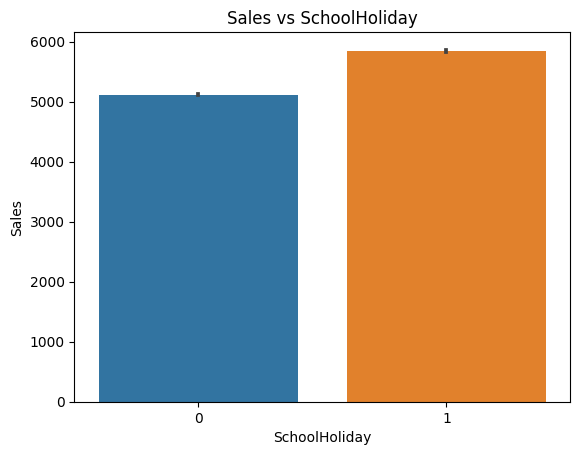

In [193]:
# Chart - 5 Sales vs SchoolHoliday
sns.barplot(x=df['SchoolHoliday'],y=df['Sales'])
plt.title('Sales vs SchoolHoliday')
plt.show()

##### 1. Why did you pick the specific chart?

i have picked barplot to find out the effect of SchoolHoliday on Sales

##### 2. What is/are the insight(s) found from the chart?

From the graph it can be seen that there is a very good sales when schoolholiday is there, also good sales can be seen when there is no school Holiday,so SchoolHoliday doesn't really affect the sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The graph helps us to understand that SchoolHoliday does affect that much on sales,so it is not that important factor which we needed to consider

#### Chart - 6

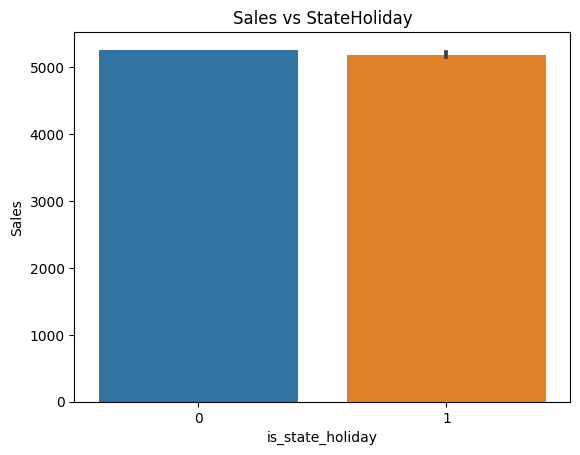

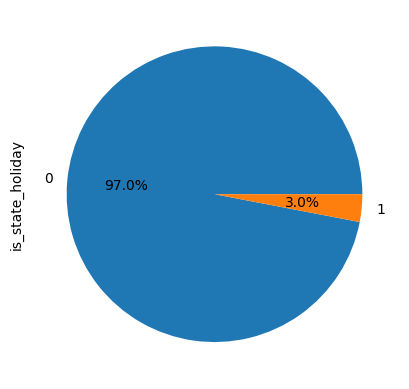

In [194]:
# Chart - sales vs StateHoliday
#plotting barplot
sns.barplot(x=df['is_state_holiday'],y=df['Sales'])
plt.title('Sales vs StateHoliday')
plt.show()
#plotting pie chart
df['is_state_holiday'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

I have picked barplot and pie-chart to find out the effect of any type of state holiday on sales by how much

##### 2. What is/are the insight(s) found from the chart?

From the barplot it can be easily seen that it doesn't matter whether there is state holiday or not there is good amount of sales on both the occassions and from the pie chart it can be seen that only 3% of sales is effected by stateholiday.So overall sales doesn't depend on stateholiday

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The stateholiday doesn't effects sales

#### Chart - 7

In [195]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'year', 'Month', 'week_num', 'is_state_holiday'],
      dtype='object')

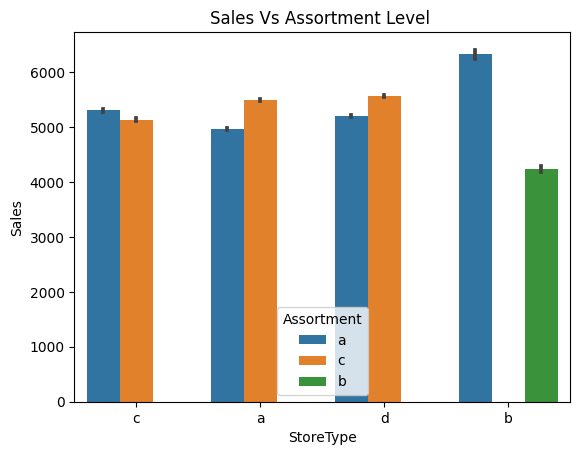

In [196]:
# Chart - Sales vs AssortmentLevel in all stores
sns.barplot(x=df['StoreType'],y=df['Sales'],hue=df['Assortment'])
plt.title('Sales Vs Assortment Level ')
plt.show()

##### 1. Why did you pick the specific chart?

I have picked barplot to visvalize the sales in different store types with different assortment levels

##### 2. What is/are the insight(s) found from the chart?

From the plot it can be visvalize that c type assortment level has maximum sales in all the store types and in store types b all the assortment levels has been used

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the graph it can be find out that sales hgot a relationship with assortment levels and only in store type b all assortment level's/stratigis has been used which might be one of the reason for the maximum sales.Therefore same stratigies can also be used in other store types

#### Chart - 8

<Axes: title={'center': 'Customer Share'}, ylabel='Customers'>

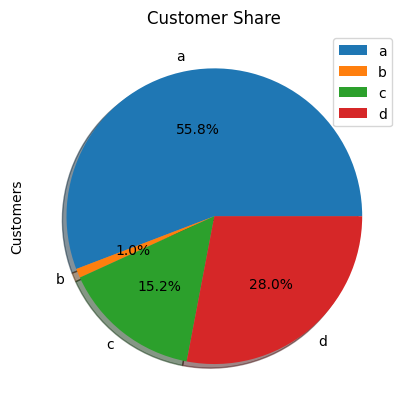

In [197]:
# Chart - 8 customer share
df.groupby('StoreType')['Customers'].sum().plot(kind='pie',autopct='%1.1f%%',legend=True,shadow=True,title='Customer Share')

##### 1. Why did you pick the specific chart?

I have Picked pie chart to find out customer share in different Store types

##### 2. What is/are the insight(s) found from the chart?

It was find out that A type of store has maximum customer share of about 55.5% followed by the d type 25.7%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Very less customer share is for b type of store because of which there will be very less sales


#### Chart - 9

Text(0.5, 1.0, 'Sales vs Customer')

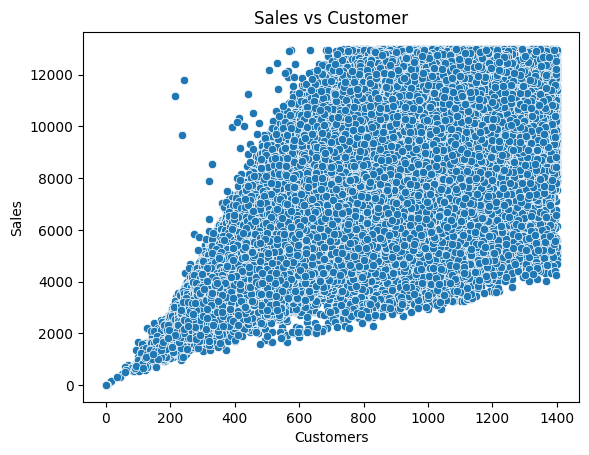

In [198]:
# Chart - 9 Relation between Sales and Customer
sns.scatterplot(x=df['Customers'],y=df['Sales'])
plt.title('Sales vs Customer')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [199]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'year', 'Month', 'week_num', 'is_state_holiday'],
      dtype='object')

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

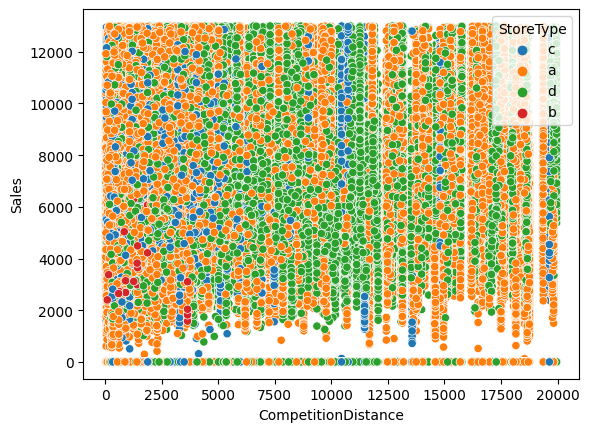

In [200]:
# Chart - 10 visualization code
sns.scatterplot(x=df['CompetitionDistance'],y=df['Sales'],hue=df['StoreType'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [201]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [202]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [203]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

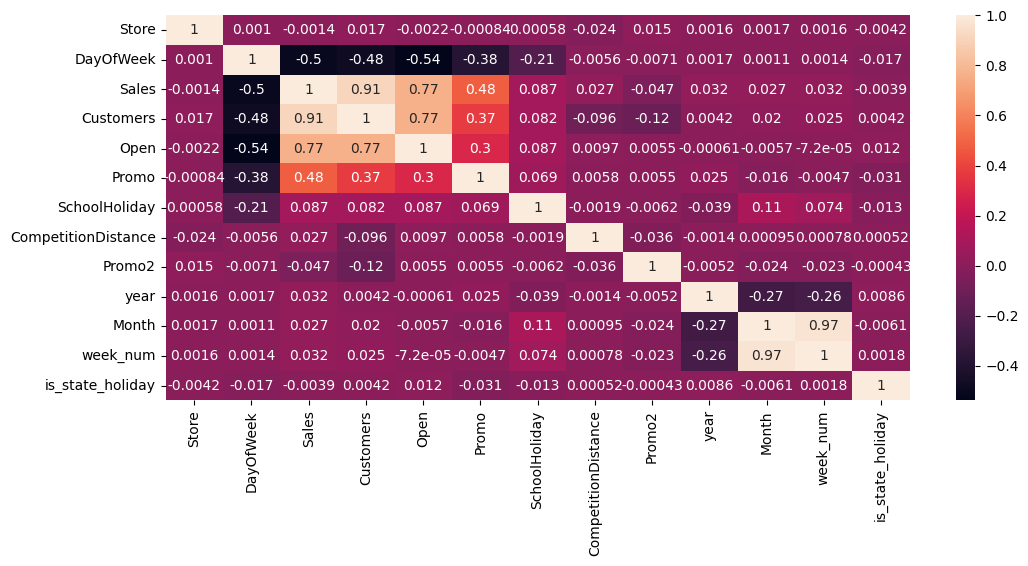

In [204]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,5))
corr=df.corr()
sns.heatmap(corr,annot=True)

##### 1. Why did you pick the specific chart?

I have Picked the heatmap to find out the correlation of all features with each other


##### 2. What is/are the insight(s) found from the chart?

* It can be find out that Promo,Open and customer has positive correlation with Sales means that if the on ruuning any promo will help in increasing the sales also more as customer visits the store there will be more sales
* Day of week is in negative correlation with sales that means on weekends Store will be closed,there will be no sales and competiton distance also some negative correlation.
* State holiday has very low negative correlation with sales as sales is not affected by state holiday same case with the school holiday
* Multicolinearity lies between promo,customers and open column


#### Chart - 15 - Pair Plot

In [205]:
# Pair Plot visualization code
#sns.pairplot(df)

Error in callback <function _draw_all_if_interactive at 0x7f8461e0e200> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f8461e0d480> (for post_execute):


KeyboardInterrupt: ignored

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [206]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [207]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [208]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908510 entries, 0 to 908509
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                908510 non-null  int64  
 1   DayOfWeek            908510 non-null  int64  
 2   Sales                908510 non-null  int64  
 3   Customers            908510 non-null  int64  
 4   Open                 908510 non-null  int64  
 5   Promo                908510 non-null  int64  
 6   SchoolHoliday        908510 non-null  int64  
 7   StoreType            908510 non-null  object 
 8   Assortment           908510 non-null  object 
 9   CompetitionDistance  908510 non-null  float64
 10  Promo2               908510 non-null  int64  
 11  year                 908510 non-null  int64  
 12  Month                908510 non-null  int64  
 13  week_num             908510 non-null  int64  
 14  is_state_holiday     908510 non-null  int64  
dtypes: float64(1), in

In [22]:
#let's change the datatype of CompetitionDistance to int
df['CompetitionDistance']=df['CompetitionDistance'].astype('int')

In [23]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
year                   0
Month                  0
week_num               0
is_state_holiday       0
dtype: int64

The data frame is already cleaned.All the missing values has already filled
during EDA Process

### 2. Handling Outliers

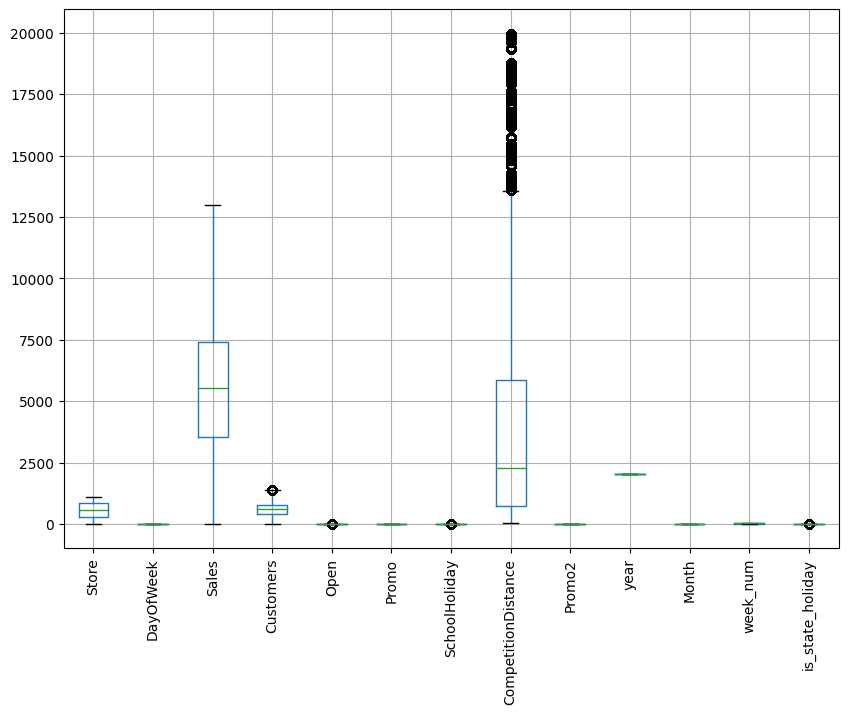

In [212]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(10,7))
df.boxplot()
plt.xticks(rotation='vertical')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers can lead to biased insights and conclusions when analyzing data.So we should treat the outliers before passing the data into our model.In our dataset only in Sales,Customers and CompetitionDistnace outliers were present and i have already removed them during EDA process by consideing values around 95 percentile and removed all other values above it

### 3. Categorical Encoding

In [24]:
#Encode the cetagorical columns
#Encode StoreType,Assortment column using One Hot Encoding
encoded_df = pd.get_dummies(df, columns=['StoreType','Assortment'],dtype=int,drop_first=True)

In [214]:
encoded_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,year,Month,week_num,is_state_holiday,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,5263,555,1,1,1,1270,0,2015,7,31,0,0,1,0,0,0
1,2,5,6064,625,1,1,1,570,1,2015,7,31,0,0,0,0,0,0
2,3,5,8314,821,1,1,1,14130,1,2015,7,31,0,0,0,0,0,0
3,6,5,5651,589,1,1,1,310,0,2015,7,31,0,0,0,0,0,0
4,8,5,8492,833,1,1,1,7520,0,2015,7,31,0,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

In Our dataframe StoreType,Assortment are Cetagorical Features,so inorder to encode these features i have used get_dummies Function from pandas for One Hot Encoding as it is straight forward and easy to use function provided by pandas to perform one hot encoding in just one line of code and also it retains the original column names and allows for easy interpretation and exploration of the encoded categorical variables

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<Axes: >

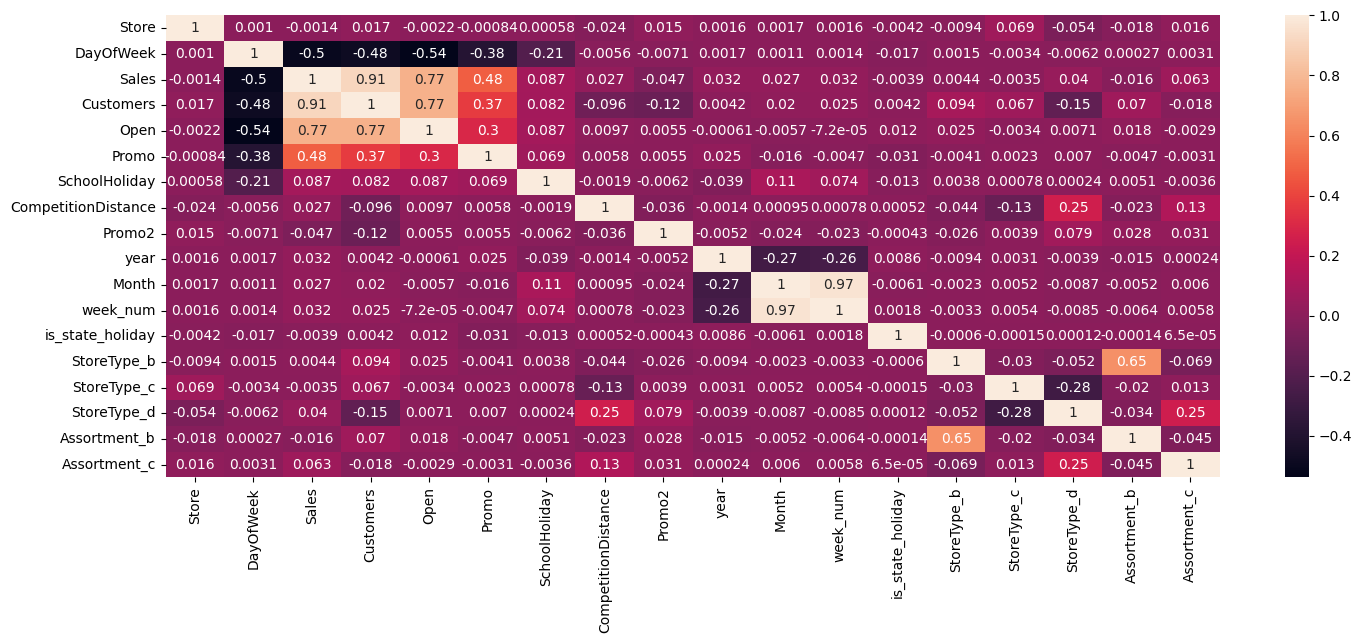

In [215]:
plt.figure(figsize=(17,6))
sns.heatmap(encoded_df.corr(),annot=True)

In [216]:
encoded_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'year', 'Month',
       'week_num', 'is_state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [26]:
# Manipulate Features to minimize feature correlation and create new features
#let's calculate the VIF to find Multicolinearity between the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=encoded_df[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'year', 'Month',
       'week_num', 'is_state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

               Variable        VIF
0                 Store   3.984583
1             DayOfWeek   8.156835
2             Customers  11.031781
3                  Open  16.044879
4                 Promo   1.990967
5         SchoolHoliday   1.303069
6   CompetitionDistance   1.944719
7                Promo2   2.251015
8                  year  31.575919
9                 Month  64.581790
10             week_num  57.659605
11     is_state_holiday   1.034501
12          StoreType_b   1.764559
13          StoreType_c   1.279965
14          StoreType_d   1.877942
15         Assortment_b   1.743752
16         Assortment_c   1.993766


Here Many of the features have very high Multicolinearity so we have to exclude some feature
* Month have very high corelation with week number i,e 0.97 and their respective corelation with sales is 0.027 and 0.032,so we will keep Week_no feature
* year feature is has also high VIF So we remove this also
* Customer and open also have high VIF value and also correlation with each other is 0.77 and with sales is 0.91 and 0.77 respectively

In [27]:
# After Analysing all feature and Removing those features having high corelation
#calculating VIF again
X=encoded_df[['Store', 'DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month',
        'is_state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

               Variable       VIF
0                 Store  3.571357
1             DayOfWeek  3.794841
2             Customers  3.613363
3                 Promo  1.906344
4         SchoolHoliday  1.253370
5   CompetitionDistance  1.850607
6                Promo2  2.030507
7                 Month  3.725059
8      is_state_holiday  1.030086
9           StoreType_b  1.762707
10          StoreType_c  1.270399
11          StoreType_d  1.791075
12         Assortment_b  1.742317
13         Assortment_c  1.973580


Here VIF is now less than 5 for all features

#### 2. Feature Selection

In [28]:
# Selecting only those features which are important
new_df=encoded_df[[ 'DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month',
        'is_state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c','Sales']]


In [29]:
new_df.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Month,is_state_holiday,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Sales
0,5,555,1,1,1270,0,7,0,0,1,0,0,0,5263
1,5,625,1,1,570,1,7,0,0,0,0,0,0,6064
2,5,821,1,1,14130,1,7,0,0,0,0,0,0,8314
3,5,589,1,1,310,0,7,0,0,0,0,0,0,5651
4,5,833,1,1,7520,0,7,0,0,0,0,0,0,8492


##### What all feature selection methods have you used  and why?

* I used heatmap to find out the corelation of all the features with each other and with sales also and it was find out that some of the features have very positive,negative and very minimum corelation with sales.Customers,open and sales have very high corelation with sales and dayofweek has low
* After that i calculated VIF value of all the features with each other and excluded those features which were having Multicolinearity

##### Which all features you found important and why?

features like  'DayOfWeek', 'Customers', 'Promo','SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month','is_state_holiday', 'StoreType_b', 'StoreType_c','StoreType_d', 'Assortment_b', 'Assortment_c','Sales' are important feature.These are having VIF under 5 and corelation with sales and also each feature is important for predicting Sales

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [30]:
#due to reinbursment the shops were closed and on those days sales were zero
new_df=new_df[new_df['Sales']!=0]

In [31]:
# Let's find out skewness of continous feature
new_df[['Customers','CompetitionDistance','Sales']].skew()

Customers              0.566354
CompetitionDistance    1.528725
Sales                  0.464931
dtype: float64

In customers,competitionsDistance there is positive skewness present,Now let's transform the data

<Axes: xlabel='Customers', ylabel='Density'>

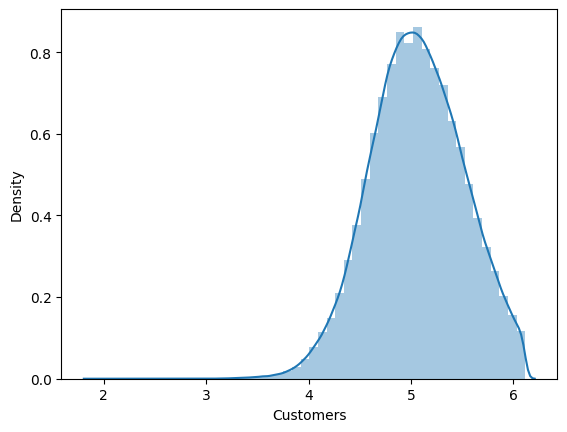

In [36]:
sns.distplot(np.sqrt(new_df['Customers']))

<Axes: xlabel='CompetitionDistance', ylabel='Density'>

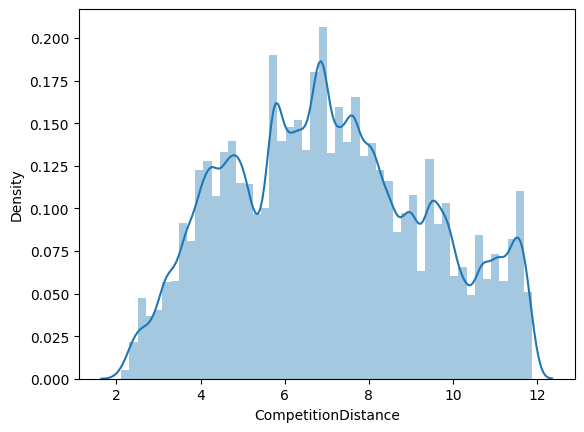

In [37]:
sns.distplot(np.sqrt(new_df['CompetitionDistance']))

In [32]:
#TransFrom the data using SQRT transformation
new_df['CompetitionDistance']=np.sqrt(new_df['CompetitionDistance'])
new_df['Customers']=np.sqrt(new_df['Customers'])


### 6. Data Scaling

In [33]:
#before Scaling let's find out dependent and independent features
X=new_df.drop(columns=['Sales']) #idependent Variable/feature
y=new_df[['Sales']]                #Dependent Variable

In [34]:
print(X.shape)
print(y.shape)

(743821, 13)
(743821, 1)


In [35]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#fit and transform
X=sc.fit_transform(X)

##### Which method have you used to scale you data and why?

I have used StandardScaler from the scikit-learn library for scaling data. This method transforms the data such that it has a mean of 0 and a standard deviation of 1.It helps to bring all features onto a similar scale.When features have significantly different scales, it can lead to biased model training or result in features with larger scales dominating the learning process.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No Need

In [229]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [38]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((595056, 13), (148765, 13), (595056, 1), (148765, 1))

##### What data splitting ratio have you used and why?

As dataset is huge i have choosen 80-20 ratio. By allocating 80% of the data to the training set, we will get enough data to train the model and capture patterns and relationships in the data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No need


In [231]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [39]:
#importing labraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor



# **Linear Regression**

In [40]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# Fit the Algorithm
lr.fit(x_train,y_train)
# Predict on the model
y_train_predict=lr.predict(x_train)
y_test_predict=lr.predict(x_test)

In [41]:
#coefficients
lr.coef_

array([[  -2.81232025, 1927.61481164,  466.31001778,    7.04603757,
         324.6027947 ,  189.14316025,   49.21233503,  -15.33310644,
         -97.19535289,  -78.20061113,  463.48291189, -176.63182468,
         104.74763935]])

In [42]:
#intercept
lr.intercept_

array([6412.33421154])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [43]:
#importing labraries to check the accuracy of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [61]:
#let's define a function of metrics
def cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred):
  #mean_squared_error metrics
  MSE_train=mean_squared_error(y_train,y_train_pred)
  print('MSE train score is :',MSE_train)
  MSE_test=mean_squared_error(y_test,y_test_pred)
  print('MSE test score is :',MSE_test)

  #Root mean square error
  print('RMSE train Score: ',np.sqrt(MSE_train))
  print('RMSE test Score: ',np.sqrt(MSE_test))

  #R2 score
  r2_train=r2_score(y_train,y_train_pred)
  print('r2 train score: ',r2_train)
  r2_test=r2_score(y_test,y_test_pred)
  print('r2 test score: ',r2_test)

In [62]:
# calculating metrics
cal_metrics_score(y_train,y_train_predict,y_test,y_test_predict)

MSE train score is : 1069066.2606629538
MSE test score is : 1074867.9174951513
RMSE train Score:  1033.9566048258282
RMSE test Score:  1036.758369869832
r2 train score:  0.7885989512061575
r2 test score:  0.7885793528359001


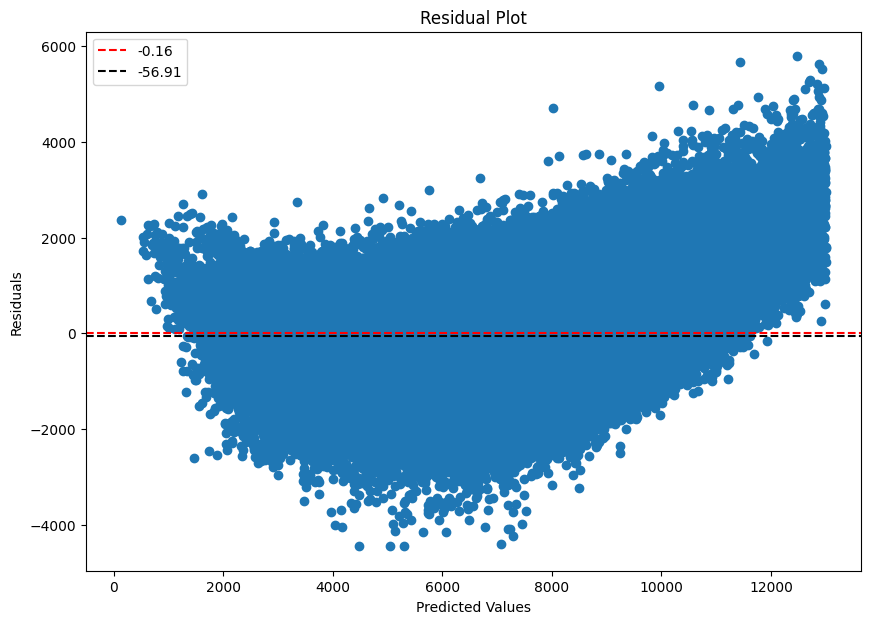

In [93]:
#plot residuals
residuals=y_test-y_test_predict
plt.figure(figsize=(10,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2)[0])
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

 linear regression model achieved a reasonably good R-squared score of 79%, indicating that it explains a significant portion of the variance in the target variable. The scatter plot of the residuals demonstrated a relatively random distribution, suggesting that the linear regression assumptions were met. The proximity of the residuals to the mean and median lines further supports the model's performance in accurately predicting the target variable.

#### 2. Cross- Validation & Hyperparameter Tuning

## Ridge Regression

In [59]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 1}
best score: 0.7885847860738385


In [63]:
# calculating metrics for Ridge
cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred)

MSE train score is : 1069066.2606791398
MSE test score is : 1074867.9282955765
RMSE train Score:  1033.9566048336553
RMSE test Score:  1036.7583750785795
r2 train score:  0.7885989512029569
r2 test score:  0.7885793507115154


# Lasso Regression

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
lasso = Lasso()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_lasso_pred = grid_search.predict(x_train)
y_test_lasso_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.7885847646876567


In [64]:
#calculating metrics for Lasso Regressions
cal_metrics_score(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

MSE train score is : 1069066.370538569
MSE test score is : 1074870.4223328757
RMSE train Score:  1033.9566579593986
RMSE test Score:  1036.7595778833565
r2 train score:  0.7885989294789539
r2 test score:  0.788578860148004


Elastic Net

In [94]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
enet= ElasticNet()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(enet, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_enet_pred = grid_search.predict(x_train)
y_test_enet_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.7861302618204605


In [67]:
#calculating metrics for ElasticNet Regression
cal_metrics_score(y_train,y_train_enet_pred,y_test,y_test_enet_pred)

MSE train score is : 1069066.370538569
MSE test score is : 1074870.4223328757
RMSE train Score:  1033.9566579593986
RMSE test Score:  1036.7595778833565
r2 train score:  0.7885989294789539
r2 test score:  0.788578860148004


##### Which hyperparameter optimization technique have you used and why?




i have used GridSearchCV technique for hyperparameter tuning . It systematically searches through a predefined set of hyperparameters and evaluates the model's performance for each combination using cross-validation

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I tried multiple regularization techniques, including Lasso, Ridge, and Elastic Net, with Gridsearch cv as a hyperparameter. However, i observed that the R-squared score remains the same despite these attempts.Now let's try some complex Models

### ML Model - 2

## ** Decision Tree**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=20)
# Fit the Algorithm
dt.fit(x_train,y_train)
# Predict on the model
y_train_dt_pred=dt.predict(x_train)
y_test_dt_pred=dt.predict(x_test)


In [75]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_dt_pred,y_test,y_test_dt_pred)

MSE train score is : 122881.32673749808
MSE test score is : 382949.5443697155
RMSE train Score:  350.544329204593
RMSE test Score:  618.8291722032143
r2 train score:  0.9757009997365581
r2 test score:  0.9246759167484337


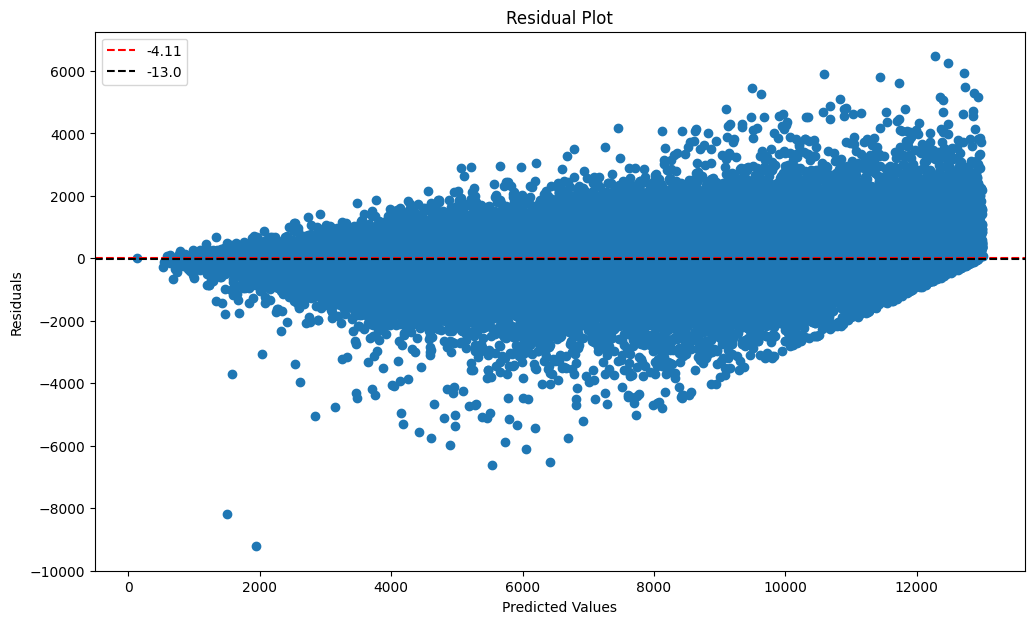

In [91]:
#plot residuals
y_test_dtt_pred= y_test_dt_pred.reshape(-1,1)
residuals=y_test-y_test_dtt_pred
plt.figure(figsize=(12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2)[0])
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
dt=DecisionTreeRegressor()
param_grid={'max_depth': [17,18,19,20], 'min_samples_leaf': [5,6,7,8], 'min_samples_split': [1,3,5]}
gridsearch=GridSearchCV(dt,param_grid,scoring='r2', cv=3)
gridsearch.fit(x_train,y_train)
# Predict on the model
y_train_dtgs_pred=gridsearch.predict(x_train)
y_test_dtgs_pred=gridsearch.predict(x_test)
# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [242]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [243]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [244]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [245]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [246]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***